In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Empty vs. Non Empty Submissions

In [74]:
subreddits = ["Ask_Politics", "Askpolitics", "PoliticalDiscussion", "PoliticalDebate", "NeutralPolitics", "politics"]
subreddits_reduced = ["Ask_Politics", "Askpolitics", "PoliticalDiscussion", "PoliticalDebate", "NeutralPolitics"]

In [75]:

com_per_sub = {}
com_per_sub_empty = {}

rep_per_com = {}
rep_per_com_empty = {}


for subr in subreddits:

    com_per_sub[subr] = pd.read_csv(f"{subr}/output/{subr}_com_per_sub.csv")
    com_per_sub_empty[subr] = pd.read_csv(f"{subr}/output/{subr}_com_per_sub_empty.csv")
    
    rep_per_com[subr] = pd.read_csv(f"{subr}/output/{subr}_rep_per_com.csv")
    rep_per_com_empty[subr] = pd.read_csv(f"{subr}/output/{subr}_rep_per_com_empty.csv")
        
    

In [76]:
# Combine data across subreddits
all_data = []

for subr in subreddits:
    # Non-empty
    df_non_empty = com_per_sub[subr].copy().rename(columns = {'nr_comments' : 'count'})
    df_non_empty['Status'] = 'Non-empty'
    df_non_empty['Subreddit'] = subr

    # Empty
    df_empty = com_per_sub_empty[subr].copy().rename(columns = {'nr_comments' : 'count'})
    df_empty['Status'] = 'Empty'
    df_empty['Subreddit'] = subr

    all_data.append(df_non_empty)
    all_data.append(df_empty)

# Combine into one DataFrame
combined_df_comments = pd.concat(all_data, ignore_index=True)

# Optionally apply log-transform to count data if skewed
combined_df_comments['count'] = combined_df_comments['count'].clip(lower=1)  # Avoid log(0)
combined_df_comments['log_count'] = np.log(combined_df_comments['count'])


In [77]:
label_fontsize

16

/tmp/ipykernel_317/2030495659.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


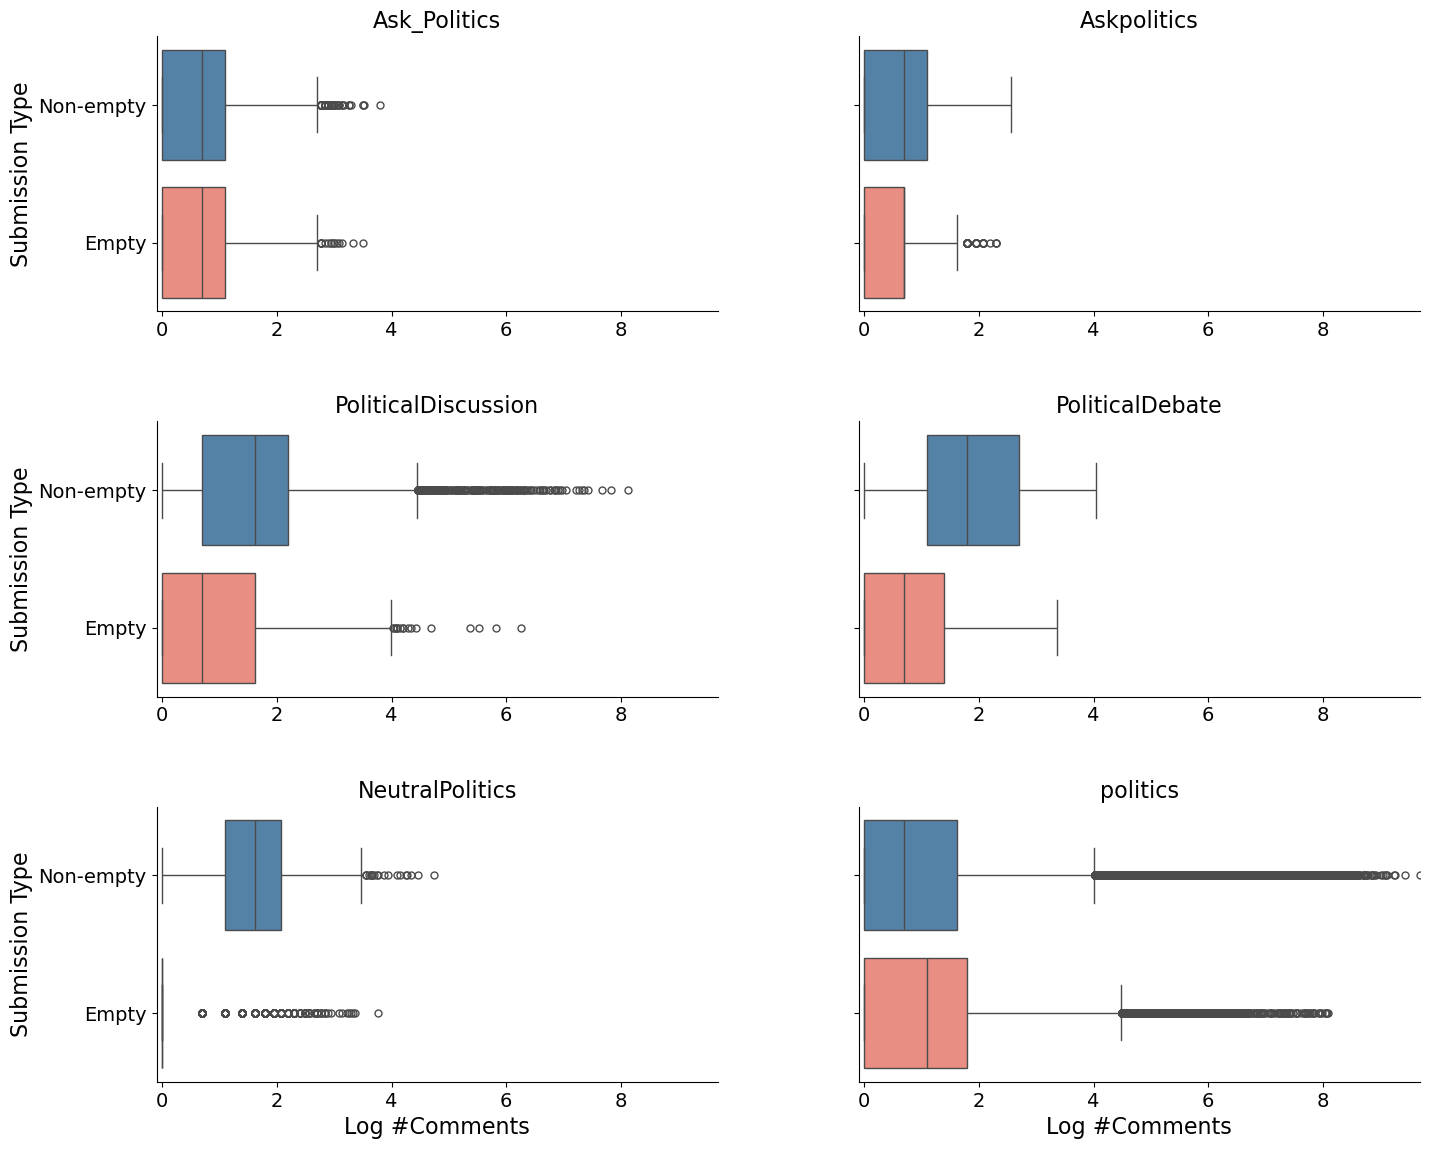

In [78]:

palette = {"Non-empty": "steelblue", "Empty": "salmon"}

# Set global font sizes
label_fontsize = 16
tick_fontsize = 14
title_fontsize = 18
facet_title_fontsize = 16

# Define figure size for each subplot (total width/height will scale accordingly)
subplot_width = 7
subplot_height = 4
n_cols = 2
n_rows = int(np.ceil(len(combined_df_comments['Subreddit'].unique()) / n_cols))


# Create the plot
g = sns.catplot(
    data=combined_df_comments,
    y='Status', x='log_count',
    col='Subreddit',
    kind='box',
    palette=palette,
    height=subplot_height, aspect=subplot_width / subplot_height,
    col_wrap=n_cols,
    sharex=False,
    legend=False
)

# Set facet titles
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.title.set_fontsize(facet_title_fontsize)

# Set axis labels and ticks
g.set_axis_labels("Log #Comments", "Submission Type", fontsize = label_fontsize)
g.set(xlim=(-0.1, combined_df_comments['log_count'].max()))

# Set label and tick sizes
for ax in g.axes.flatten():
    #ax.set_xlabel("Log #Comments", fontsize=label_fontsize)
    ax.set_ylabel("Submission Type", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)

# Adjust subplot spacing and title
g.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.25)
#g.fig.suptitle("Distribution of Comments per Submission\n(Empty vs. Non-empty Submissions)", fontsize=title_fontsize)

# Set full figure size explicitly
total_width = subplot_width * n_cols
total_height = subplot_height * n_rows
g.fig.set_size_inches(total_width, total_height)

   
# Export to PDF
g.fig.savefig("plots/comments_distribution_boxplot.pdf", bbox_inches='tight')


In [79]:
# Combine data across subreddits
all_data = []

for subr in subreddits:
    # Non-empty
    df_non_empty = rep_per_com[subr].copy().rename(columns = {'nr_replies' : 'count'})
    df_non_empty['Status'] = 'Non-empty'
    df_non_empty['Subreddit'] = subr

    # Empty
    df_empty = rep_per_com_empty[subr].copy().rename(columns = {'nr_replies' : 'count'})
    df_empty['Status'] = 'Empty'
    df_empty['Subreddit'] = subr

    all_data.append(df_non_empty)
    all_data.append(df_empty)

# Combine into one DataFrame
combined_df_replies = pd.concat(all_data, ignore_index=True)

# Optionally apply log-transform to count data if skewed
combined_df_replies['count'] = combined_df_replies['count'].clip(lower=1)  # Avoid log(0)
combined_df_replies['log_count'] = np.log10(combined_df_replies['count'])



/tmp/ipykernel_317/3381768355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


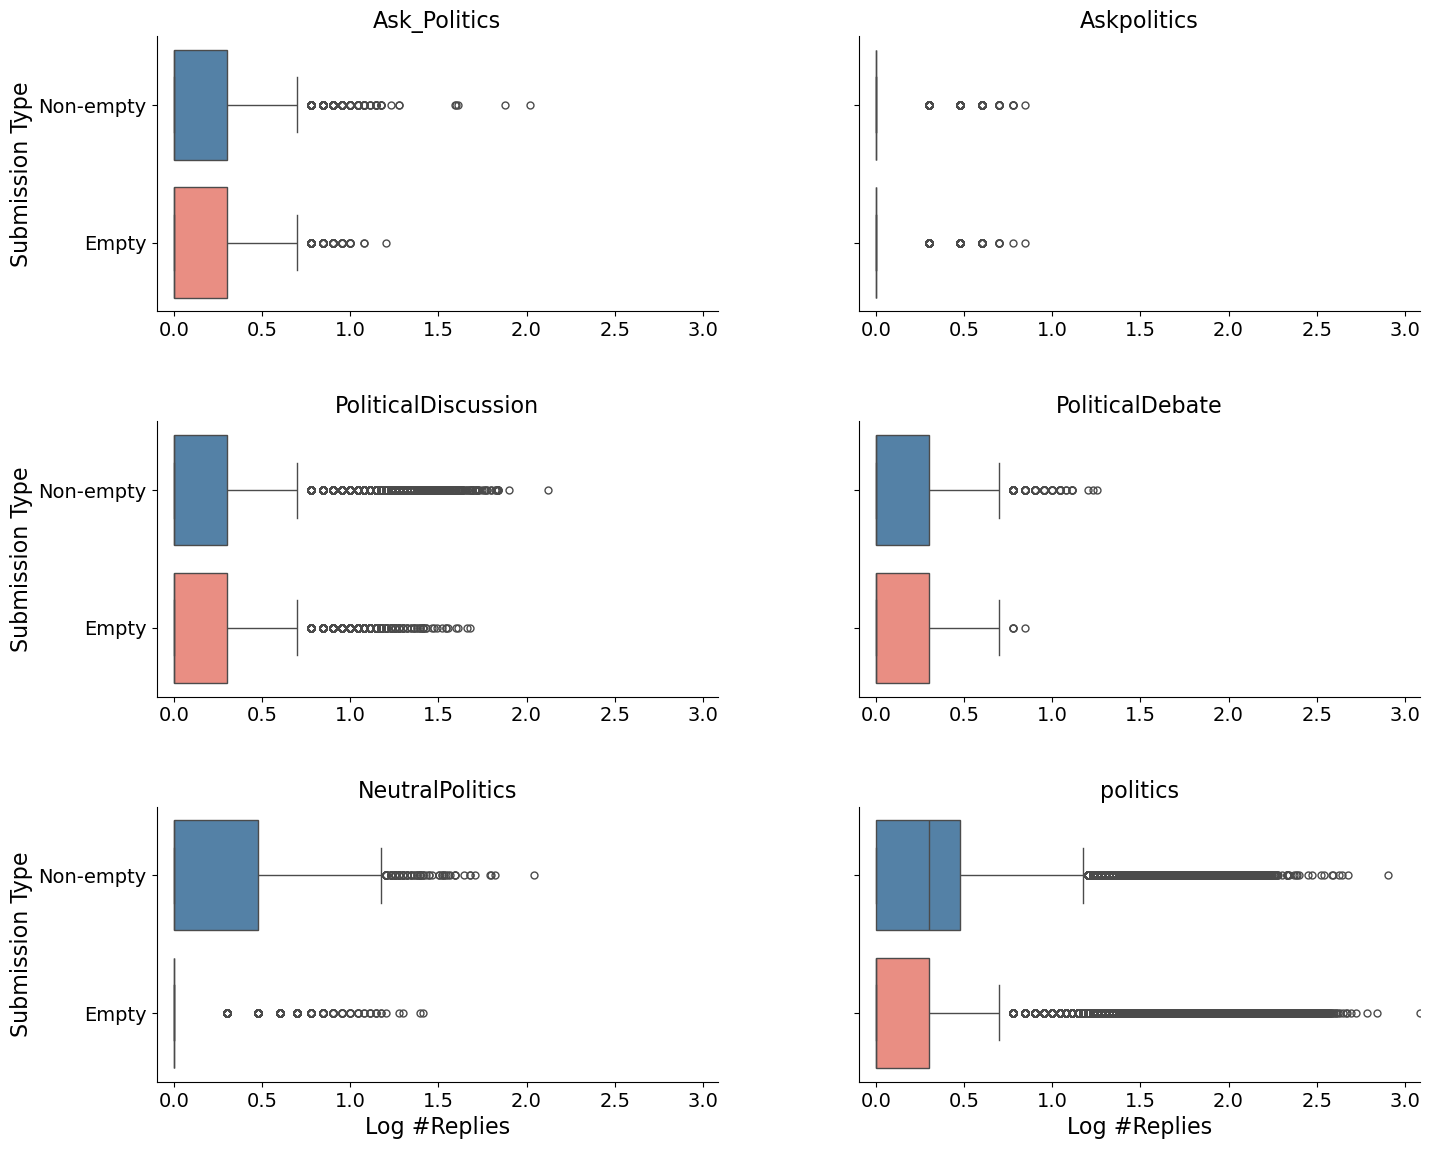

In [80]:

palette = {"Non-empty": "steelblue", "Empty": "salmon"}


# Define figure size for each subplot (total width/height will scale accordingly)
subplot_width = 7
subplot_height = 4
n_cols = 2
n_rows = int(np.ceil(len(combined_df_replies['Subreddit'].unique()) / n_cols))


# Create the plot
g = sns.catplot(
    data=combined_df_replies,
    y='Status', x='log_count',
    col='Subreddit',
    kind='box',
    palette=palette,
    height=subplot_height, aspect=subplot_width / subplot_height,
    col_wrap=n_cols,
    sharex=False,
    legend=False
)

# Set facet titles
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.title.set_fontsize(facet_title_fontsize)

# Set axis labels and ticks
g.set_axis_labels("Log #Replies", "Submission Type", fontsize = label_fontsize)
g.set(xlim=(-0.1, combined_df_replies['log_count'].max()))

# Set label and tick sizes
for ax in g.axes.flatten():
    #ax.set_xlabel("Log #Comments", fontsize=label_fontsize)
    ax.set_ylabel("Submission Type", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)

# Adjust subplot spacing and title
g.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.25)
#g.fig.suptitle("Distribution of Comments per Submission\n(Empty vs. Non-empty Submissions)", fontsize=title_fontsize)

# Set full figure size explicitly
total_width = subplot_width * n_cols
total_height = subplot_height * n_rows
g.fig.set_size_inches(total_width, total_height)

   
# Export to PDF
g.fig.savefig("plots/replies_distribution_boxplot.pdf", bbox_inches='tight')


# Distribution of Comments per Submission and Replies per Comment, Final Data

In [35]:

final_dfs = {}
com_per_sub_final = {}
rep_per_com_final = {}


for subr in subreddits_reduced:
    final_dfs[subr] = pd.read_csv(f"../data/new_preprocessing/{subr}_new_preprocessing_com_rep.csv")
    
    com_per_sub_final[subr] = final_dfs[subr].groupby('submission_id').agg(
        count=('msg_id_parent', 'count'),
        type=('msg_id_parent', lambda x: 'comment')
    ).reset_index().rename(columns = {'submission_id' : 'top_id'})

    rep_per_com_final[subr] = final_dfs[subr].groupby('msg_id_parent').agg(
        count=('msg_id_child', 'count'),
        type=('msg_id_child', lambda x: 'reply')
    ).reset_index().rename(columns = {'msg_id_parent' : 'top_id'})




# politics from zip files
df_chunks = []
with zipfile.ZipFile("../data/new_preprocessing/splitted_politics_data.zip", 'r') as zf:
    file_list = zf.namelist()  # Get all file names in ZIP

    # Sort to maintain order (if needed)
    file_list.sort()  

    print("Files found in ZIP:", file_list)  # Debugging step

    for file in file_list:
        with zf.open(file) as f:
            df_chunk = pd.read_csv(f,  quotechar='"', encoding="utf-8")  
            df_chunks.append(df_chunk)  # Store the chunk


politics = pd.concat(df_chunks, ignore_index=True)

print(f"Successfully loaded {len(politics)} rows.")


Files found in ZIP: ['data_part_1.csv', 'data_part_2.csv', 'data_part_3.csv', 'data_part_4.csv', 'data_part_5.csv']
Successfully loaded 4175294 rows.


In [37]:
for col in ['msg_id_parent', 'msg_id_child', 'submission_id',
            'subreddit', 
            'body_child', 'body_parent', 'submission_text',
            'author_child', 'author_parent', 'author_submission']:
    if politics[col].dtype == "object":  # Apply only to string columns
        politics[col] = politics[col].str.strip('"')

politics

,msg_id_parent,msg_id_child,submission_id,subreddit,body_child,body_parent,submission_text,exact_time_child,exact_time_parent,exact_time_submission,author_child,author_parent,author_submission
0,c0ae9r5,c0aeb6y,8tp50,politics,That is what I'm looking for. Links would be a...,O'Reilly was actually against FISA and Bush on...,The video from last nights World's Worst is wo...,1.245362e+09,1.245360e+09,1.245356e+09,hyperbolic,pb1x,hyperbolic
1,c0aeds9,c0aee4d,8tp50,politics,As an addendum about their respective networks...,Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245368e+09,1.245367e+09,1.245356e+09,OMFG-Spot,OMFG-Spot,hyperbolic
2,c0aeds9,c0aeglj,8tp50,politics,"That's awesome and all, but do you have any ev...",Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245373e+09,1.245367e+09,1.245356e+09,hyperbolic,OMFG-Spot,hyperbolic
3,c0aeds9,c0aehqw,8tp50,politics,I don't understand your argument. Are you sayi...,Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245376e+09,1.245367e+09,1.245356e+09,rocketvat,OMFG-Spot,hyperbolic
4,c0aecro,c0aegcb,8tp50,politics,don't you have anything better to do than whin...,"waaah FOX NEWS, do you people have anything be...",The video from last nights World's Worst is wo...,1.245372e+09,1.245365e+09,1.245356e+09,clorby,Laughsatyou,hyperbolic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175289,kfkh5ib,kfmd52k,18uirzt,politics,Fact-checking doesnt work if no one hears you ...,Jen Sorensen Future veterans of the informatio...,"It's Saturday, folks. Let's all kick back with...",1.703978e+09,1.703953e+09,1.703952e+09,Knightforlife,freddiethebaer,optimalg
4175290,kfklsb6,kforzbx,18uirzt,politics,This is such a spot on interpretation of what'...,Yakima Herald-Republic and other papers in syn...,"It's Saturday, folks. Let's all kick back with...",1.704023e+09,1.703954e+09,1.703952e+09,bakerfredricka,4blockhead,optimalg
4175291,kfmq5kr,kfp6tzv,18uirzt,politics,Voting is not nearly that simple. In a first p...,Courtesy the Star Tribune's Steve Sack,"It's Saturday, folks. Let's all kick back with...",1.704032e+09,1.703983e+09,1.703952e+09,glassjar1,DoubleTFan,optimalg
4175292,kfp3d4v,kfp8xh8,18uirzt,politics,"also, try explaining why biden is better to a ...",Doonesbury by Trudeau ...explain it like I'm ...,"It's Saturday, folks. Let's all kick back with...",1.704033e+09,1.704030e+09,1.703952e+09,HaulinBoats,4blockhead,optimalg


In [81]:
final_dfs['politics'] = politics

com_per_sub_final['politics'] = final_dfs["politics"].groupby('submission_id').agg(
    count=('msg_id_parent', 'count'),
    type=('msg_id_parent', lambda x: 'comment')
).reset_index().rename(columns = {'submission_id' : 'top_id'})

rep_per_com_final['politics'] = final_dfs["politics"].groupby('msg_id_parent').agg(
    count=('msg_id_child', 'count'),
    type=('msg_id_child', lambda x: 'reply')
).reset_index().rename(columns = {'msg_id_parent' : 'top_id'})


In [82]:
df_com_per_sub_all = []
df_rep_per_com_all = []

for subr in subreddits:
    df1 = com_per_sub_final[subr].copy()
    df1['Subreddit'] = subr
    df_com_per_sub_all.append(df1)

    df2 = rep_per_com_final[subr].copy()
    df2['Subreddit'] = subr
    df_rep_per_com_all.append(df2)

df_com_per_sub_all = pd.concat(df_com_per_sub_all, ignore_index=True)
df_rep_per_com_all = pd.concat(df_rep_per_com_all, ignore_index=True)

df_com_per_sub_all['count'] = df_com_per_sub_all['count'].clip(lower=1)
df_com_per_sub_all['log_count'] = np.log(df_com_per_sub_all['count'])

df_rep_per_com_all['count'] = df_rep_per_com_all['count'].clip(lower=1)
df_rep_per_com_all['log_count'] = np.log(df_rep_per_com_all['count'])


In [83]:
df_combined = pd.concat([df_com_per_sub_all, df_rep_per_com_all], ignore_index=True)
df_combined

,top_id,count,type,Subreddit,log_count
0,101vyr4,4,comment,Ask_Politics,1.386294
1,104c132,3,comment,Ask_Politics,1.098612
2,104nrua,5,comment,Ask_Politics,1.609438
3,104wk36,8,comment,Ask_Politics,2.079442
4,10661ll,1,comment,Ask_Politics,0.000000
...,...,...,...,...,...
2084268,kfkiulh,1,reply,politics,0.000000
2084269,kfklsb6,1,reply,politics,0.000000
2084270,kflblhg,1,reply,politics,0.000000
2084271,kfmq5kr,1,reply,politics,0.000000


/tmp/ipykernel_317/2846834995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


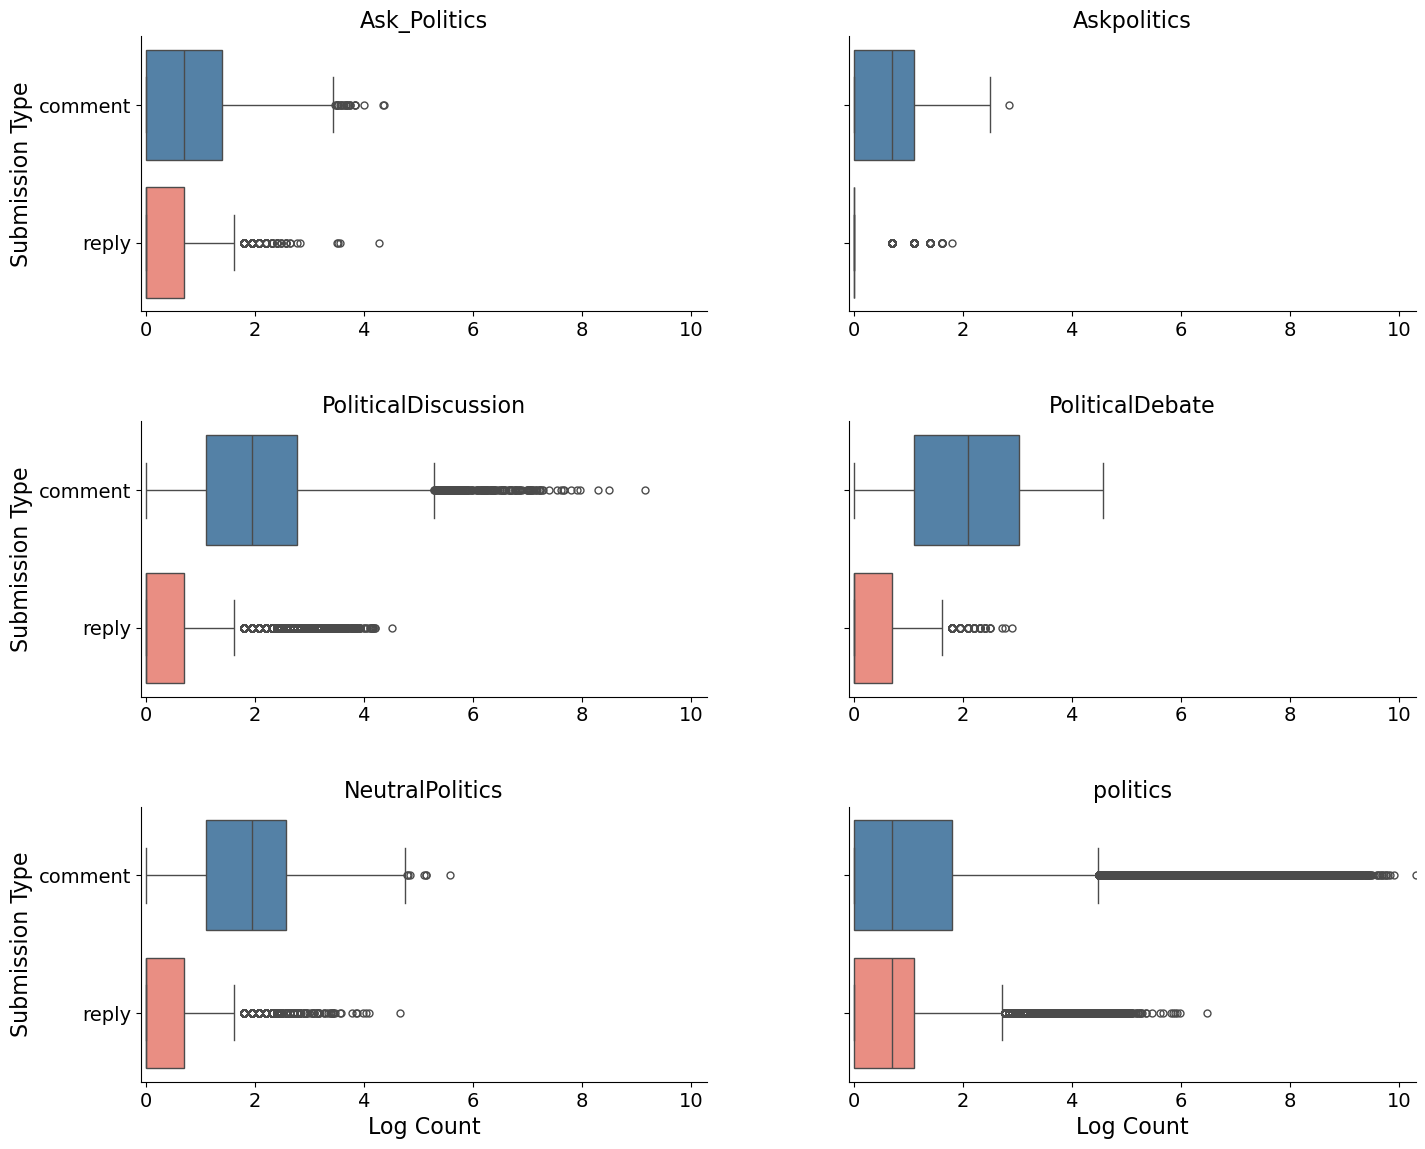

In [84]:

palette = {'comment': 'steelblue', 'reply': 'salmon'}

# Define figure size for each subplot (total width/height will scale accordingly)
subplot_width = 7
subplot_height = 4
n_cols = 2
n_rows = int(np.ceil(len(df_combined['Subreddit'].unique()) / n_cols))


# Create the plot
g = sns.catplot(
    data=df_combined,
    y='type', x='log_count',
    col='Subreddit',
    kind='box',
    palette=palette,
    height=subplot_height, aspect=subplot_width / subplot_height,
    col_wrap=n_cols,
    sharex=False,
    legend=False
)

# Set facet titles
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.title.set_fontsize(facet_title_fontsize)

# Set axis labels and ticks
g.set_axis_labels("Log Count", "Type", fontsize = label_fontsize)
g.set(xlim=(-0.1, df_combined['log_count'].max()))

# Set label and tick sizes
for ax in g.axes.flatten():
    #ax.set_xlabel("Log #Comments", fontsize=label_fontsize)
    ax.set_ylabel("Submission Type", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)

# Adjust subplot spacing and title
g.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.25)
#g.fig.suptitle("Distribution of Comments per Submission\n(Empty vs. Non-empty Submissions)", fontsize=title_fontsize)

# Set full figure size explicitly
total_width = subplot_width * n_cols
total_height = subplot_height * n_rows
g.fig.set_size_inches(total_width, total_height)

   
# Export to PDF
g.fig.savefig("plots/com_rep_distribution_boxplot.pdf", bbox_inches='tight')


# Mod vs. Non-Mod Submissions

In [85]:
final_dfs['PoliticalDebate']["Mod_subm"] = final_dfs['PoliticalDebate']["author_submission"] \
    .isin(["AutoModerator"]) \
    .map({True: "Mod", False: "No_Mod"})

final_dfs['politics']["Mod_subm"] = final_dfs['politics']["author_submission"] \
    .isin(["PoliticsMod", "PoliticsModeratorBot", "AutoModerator"]) \
    .map({True: "Mod", False: "No_Mod"})

In [57]:
final_dfs['politics']

,msg_id_parent,msg_id_child,submission_id,subreddit,body_child,body_parent,submission_text,exact_time_child,exact_time_parent,exact_time_submission,author_child,author_parent,author_submission,Mod_subm
0,c0ae9r5,c0aeb6y,8tp50,politics,That is what I'm looking for. Links would be a...,O'Reilly was actually against FISA and Bush on...,The video from last nights World's Worst is wo...,1.245362e+09,1.245360e+09,1.245356e+09,hyperbolic,pb1x,hyperbolic,No_Mod
1,c0aeds9,c0aee4d,8tp50,politics,As an addendum about their respective networks...,Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245368e+09,1.245367e+09,1.245356e+09,OMFG-Spot,OMFG-Spot,hyperbolic,No_Mod
2,c0aeds9,c0aeglj,8tp50,politics,"That's awesome and all, but do you have any ev...",Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245373e+09,1.245367e+09,1.245356e+09,hyperbolic,OMFG-Spot,hyperbolic,No_Mod
3,c0aeds9,c0aehqw,8tp50,politics,I don't understand your argument. Are you sayi...,Of course it's fine for Olbermann to occasiona...,The video from last nights World's Worst is wo...,1.245376e+09,1.245367e+09,1.245356e+09,rocketvat,OMFG-Spot,hyperbolic,No_Mod
4,c0aecro,c0aegcb,8tp50,politics,don't you have anything better to do than whin...,"waaah FOX NEWS, do you people have anything be...",The video from last nights World's Worst is wo...,1.245372e+09,1.245365e+09,1.245356e+09,clorby,Laughsatyou,hyperbolic,No_Mod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175289,kfkh5ib,kfmd52k,18uirzt,politics,Fact-checking doesnt work if no one hears you ...,Jen Sorensen Future veterans of the informatio...,"It's Saturday, folks. Let's all kick back with...",1.703978e+09,1.703953e+09,1.703952e+09,Knightforlife,freddiethebaer,optimalg,No_Mod
4175290,kfklsb6,kforzbx,18uirzt,politics,This is such a spot on interpretation of what'...,Yakima Herald-Republic and other papers in syn...,"It's Saturday, folks. Let's all kick back with...",1.704023e+09,1.703954e+09,1.703952e+09,bakerfredricka,4blockhead,optimalg,No_Mod
4175291,kfmq5kr,kfp6tzv,18uirzt,politics,Voting is not nearly that simple. In a first p...,Courtesy the Star Tribune's Steve Sack,"It's Saturday, folks. Let's all kick back with...",1.704032e+09,1.703983e+09,1.703952e+09,glassjar1,DoubleTFan,optimalg,No_Mod
4175292,kfp3d4v,kfp8xh8,18uirzt,politics,"also, try explaining why biden is better to a ...",Doonesbury by Trudeau ...explain it like I'm ...,"It's Saturday, folks. Let's all kick back with...",1.704033e+09,1.704030e+09,1.703952e+09,HaulinBoats,4blockhead,optimalg,No_Mod


In [86]:


PolDeb_comments = final_dfs['PoliticalDebate'].groupby("submission_id").agg(
    count=('msg_id_parent', 'count'),
    type=('Mod_subm','first')
).reset_index().rename(columns = {'submission_id' : 'top_id'})


PolDeb_replies = final_dfs['PoliticalDebate'].groupby("msg_id_parent").agg(
    count=('msg_id_child', 'count'),
    type=('Mod_subm','first')
).reset_index().rename(columns = {'msg_id_parent' : 'top_id'})

pol_comments = final_dfs['politics'].groupby("submission_id").agg(
    count=('msg_id_parent', 'count'),
    type=('Mod_subm','first')
).reset_index().rename(columns = {'submission_id' : 'top_id'})


pol_replies = final_dfs['politics'].groupby("msg_id_parent").agg(
    count=('msg_id_child', 'count'),
    type=('Mod_subm','first')
).reset_index().rename(columns = {'msg_id_parent' : 'top_id'})




In [87]:
def prep_df(df, subreddit, plot_type):
    df = df.copy()
    df['Subreddit'] = subreddit
    df['Plot'] = plot_type
    df['count'] = df['count'].clip(lower=1)
    df['log_count'] = np.log(df['count'])
    return df

# Prepare individual frames
poldeb_com = prep_df(PolDeb_comments, 'PoliticalDebate', 'Comments per Submission')
poldeb_rep = prep_df(PolDeb_replies, 'PoliticalDebate', 'Replies per Comment')
pol_com = prep_df(pol_comments, 'politics', 'Comments per Submission')
pol_rep = prep_df(pol_replies, 'politics', 'Replies per Comment')


In [88]:
pol_com

,top_id,count,type,Subreddit,Plot,log_count
0,1001a3h,30,No_Mod,politics,Comments per Submission,3.401197
1,101heyo,4,No_Mod,politics,Comments per Submission,1.386294
2,102a8k0,8363,Mod,politics,Comments per Submission,9.031572
3,1035ppc,12188,Mod,politics,Comments per Submission,9.408207
4,103lz8z,1686,Mod,politics,Comments per Submission,7.430114
...,...,...,...,...,...,...
37896,zyf1z,2,No_Mod,politics,Comments per Submission,0.693147
37897,zyf6u,8,No_Mod,politics,Comments per Submission,2.079442
37898,zyhj7,3,No_Mod,politics,Comments per Submission,1.098612
37899,zyhjw,3,No_Mod,politics,Comments per Submission,1.098612


/tmp/ipykernel_317/1202065894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


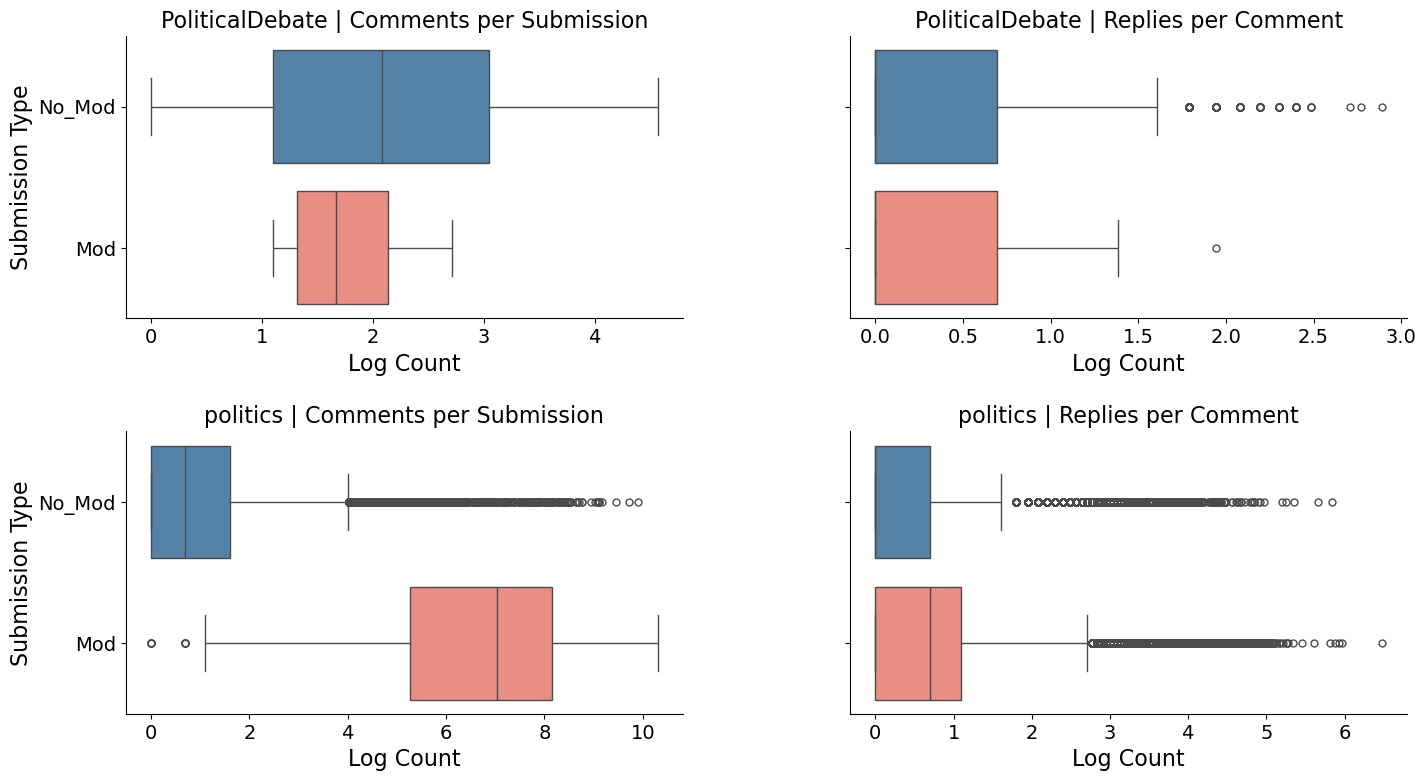

In [91]:

# Combine all into one DataFrame
df_all = pd.concat([poldeb_com, poldeb_rep, pol_com, pol_rep], ignore_index=True)

# 2. Plot settings
palette = {"Mod": "salmon", "No_Mod": "steelblue"}


# 3. Create the plot
g = sns.catplot(
    data=df_all,
    x='log_count', y='type',  # Horizontal boxplots
    col='Plot', row='Subreddit',
    kind='box',
    palette=palette,
    height=subplot_height,
    aspect=subplot_width / subplot_height,
    sharex=False,
    legend=False
)

# Set axis labels and ticks
g.set_axis_labels("Log Count", "Submission Type", fontsize=label_fontsize)
g.set_titles(col_template="{col_name}", row_template="{row_name}")  # Set titles
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=facet_title_fontsize)     # Update fontsize manually

for ax in g.axes.flatten():
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.set_ylabel("Submission Type", fontsize=label_fontsize)
    ax.set_xlabel("Log Count", fontsize=label_fontsize)

# Adjust layout and size
g.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
g.fig.set_size_inches(subplot_width * 2, subplot_height * 2)

# Export to PDF
g.fig.savefig("plots/mod_vs_nonmod_boxplot.pdf", bbox_inches='tight')